In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#  Анализ данных в CSV файле из Яндекс Такси

Чтение данных из CSV файла

In [2]:
data = pd.read_csv('orders.csv') 

In [5]:
data

,created_at_utc,tariff_class,tariff_internal_name,status,taxi_status,vehicle_model,vehicle_color,vehicle_car_region,payment_cost,payment_currency_code,driver_call_model
0,1622145491,Эконом,econom,cancelled,waiting,Kia Rio,белый,34,52.00,RUB,no_call
1,1622145422,Эконом,econom,cancelled,driving,LADA (ВАЗ) Granta,серый,34,0.00,RUB,no_call
2,1622145212,Эконом,econom,finished,complete,Renault Logan,белый,34,104.70,RUB,on_demand
3,1622054615,Эконом,econom,finished,complete,LADA (ВАЗ) Granta,белый,34,120.00,RUB,on_demand
4,1622045036,Эконом,econom,finished,complete,LADA (ВАЗ) Granta,белый,34,115.50,RUB,on_demand
...,...,...,...,...,...,...,...,...,...,...,...
1200,1617028952,Эконом,econom,finished,complete,LADA (ВАЗ) Largus,белый,34,472.40,RUB,no_call
1201,1617028458,Эконом,econom,cancelled,driving,LADA (ВАЗ) Granta,белый,34,0.00,RUB,no_call
1202,1617025078,Эконом,econom,finished,complete,LADA (ВАЗ) Granta,серый,34,146.85,RUB,no_call
1203,1616869125,Эконом,econom,cancelled,driving,LADA (ВАЗ) Largus,серый,34,0.00,RUB,no_call


Изучение информации о DataFrame

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   created_at_utc         1205 non-null   int64  
 1   tariff_class           1205 non-null   object 
 2   tariff_internal_name   1205 non-null   object 
 3   status                 1205 non-null   object 
 4   taxi_status            1205 non-null   object 
 5   vehicle_model          1205 non-null   object 
 6   vehicle_color          1205 non-null   object 
 7   vehicle_car_region     1205 non-null   int64  
 8   payment_cost           1205 non-null   float64
 9   payment_currency_code  1205 non-null   object 
 10  driver_call_model      1205 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 103.7+ KB


Поиск названий всех возможных тарифов

In [7]:
data['tariff_class'].unique()

array(['Эконом', 'Комфорт', 'Комфорт+', 'Доставка'], dtype=object)

Поиск средней цены в тарифе "Комфорт+"

In [21]:
avg_price_comfort_plus = data[(data['tariff_class'] == 'Комфорт+') & (data['status'] == 'finished')].payment_cost.mean()

In [22]:
avg_price_comfort_plus

851.3448275862069

Процент завершенных поездок в тарифе "Эконом"

In [27]:
prst_of_finished_econom = len(data[(data['tariff_class'] == 'Эконом') & (data['status'] == 'finished')]) / len(data[data['tariff_class'] == 'Эконом']) 

In [28]:
prst_of_finished_econom

0.7909604519774012

Поиск наименований всех моделей авто

In [29]:
data['vehicle_model'].unique()

array(['Kia Rio', 'LADA (ВАЗ) Granta', 'Renault Logan', 'Datsun on-DO',
       'LADA (ВАЗ) Vesta', 'Kia Soul', 'Volkswagen Polo',
       'Renault Duster', 'LADA (ВАЗ) XRAY', 'Hyundai Accent',
       'Hyundai Sonata', 'Kia Cerato', 'Hyundai Solaris',
       'Chevrolet Lacetti', 'Skoda Rapid', 'Mazda 6', 'Kia Spectra',
       'Skoda Octavia', 'Toyota Camry', 'Mitsubishi Outlander',
       'Nissan Almera', 'Fiat Albea', 'Hyundai Elantra', 'Daewoo Nexia',
       'LADA (ВАЗ) Largus', 'Ford Focus', 'Lifan Solano', 'Hyundai ix35',
       'LADA (ВАЗ) Kalina', 'Chevrolet Aveo', 'Suzuki SX4', "Kia Cee'd",
       'Citroen C3', 'Ford Fiesta', 'Renault Arkana', 'Kia Optima',
       'LADA (ВАЗ) 2112', 'Geely MK Cross', 'Chevrolet Niva',
       'Skoda Fabia', 'Kia Sorento', 'Renault Kaptur', 'Renault Sandero',
       'LADA (ВАЗ) Priora', 'Chery Tiggo 3', 'Nissan Qashqai',
       'Hyundai Verna', 'Mitsubishi Galant', 'Volkswagen Tiguan',
       'Chevrolet Cruze', 'Nissan Almera Classic',
       'Renau

Поиск поездок на Chevrolet Niva

In [30]:
data[data['vehicle_model'] == 'Chevrolet Niva']

,created_at_utc,tariff_class,tariff_internal_name,status,taxi_status,vehicle_model,vehicle_color,vehicle_car_region,payment_cost,payment_currency_code,driver_call_model
209,1611167935,Эконом,econom,finished,complete,Chevrolet Niva,серый,30,140.0,RUB,no_call


Поиск самой часто встречающейся машины в таблице

In [31]:
data['vehicle_model'].value_counts().idxmax()

'Renault Logan'

Поиск самых популярных авто в разных тарифах

In [86]:
data.groupby('tariff_class').vehicle_model.agg(pd.Series.mode).to_frame()

,vehicle_model
tariff_class,
Доставка,"[LADA (ВАЗ) Largus, Volkswagen Polo]"
Комфорт,Kia Optima
Комфорт+,Kia Optima
Эконом,LADA (ВАЗ) Granta


Поиск самых популярных цветов авто в разных тарифах

In [87]:
data.groupby('tariff_class').vehicle_color.agg(pd.Series.mode).to_frame()

,vehicle_color
tariff_class,
Доставка,"[жёлтый, чёрный]"
Комфорт,белый
Комфорт+,белый
Эконом,белый


Диаграмма: 15 самых популярных авто в такси

In [72]:
s1 = data['vehicle_model'].value_counts()

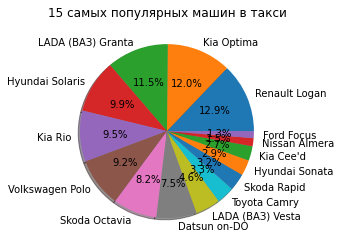

In [79]:
explode = (0.2, 0, 0, 0, 0, 0)
plt.pie(s1.values[:15], labels=s1.index[:15],
autopct='%1.1f%%', shadow=True)
plt.title('15 самых популярных машин в такси')
plt.show()

Диаграмма: 10 самых популярных регионов в таблице такси

In [89]:
s2 = data['vehicle_car_region'].value_counts()

In [90]:
bar_values = s2.values

In [102]:
bar_x = s2.index.values

In [105]:
df_bar = pd.DataFrame({'regions':bar_x, 'value_counts':bar_values})

In [111]:
df_bar_last_ten = df_bar[df_bar['value_counts'] > 5]

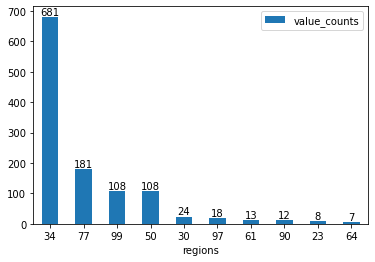

In [133]:
ax = df_bar_last_ten.plot.bar(x='regions', y='value_counts', rot=0)
for container in ax.containers:
    ax.bar_label(container)

Диаграмма: средняя цена в каждом тарифе

In [116]:
price_check = data[data['status'] == 'finished']

In [118]:
s3 = price_check.groupby('tariff_class').payment_cost.mean()

In [121]:
bar2_values = s3.values

In [122]:
bar2_x = s3.index.values

In [123]:
df_bar2 = pd.DataFrame({'tariff':bar2_x, 'mean_price':bar2_values})

In [128]:
df_bar2.sort_values(by = 'mean_price', inplace = True)

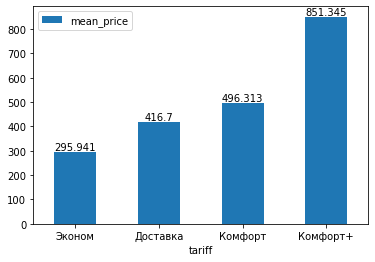

In [132]:
ax = df_bar2.plot.bar(x='tariff', y='mean_price', rot=0)
for container in ax.containers:
    ax.bar_label(container)